# Influence of a deviating center of light on the uncertainty of photogoniometric measurements

## Introduction
The luminous intensity distribution (LID) is constructed from multiple measurements performed for different directions relative to the source. These measurements are normally performed with a far field photogoniometer. For every measured direction it samples the illumincance caused by the source in a certain distance and derives from this the luminous intensity. 
Each of these measurements is individually afflicted with an uncertainty. The uncertainty is comprised of various contributions. They stem from the mechanical measurement setup and the sensor and are also effected by the object to be measured.
It is an ongoing effort to better model the uncertainty of photogoniometric measurements. Currently most measurements lack an uncertainty evaluation entirely, which makes comparing the measurements impossible.
The uncertainty contribution of the sensor, either photometer or camera-based, can already be modelled. So can the uncertainty contribution from the manipulator, that is positioning and orienting the source or detector. Since the location and orientation of the object placed on the goniometer is unknown, the uncertainty of the manipulator pose cannot be propagated to the source and its luminous intensity distribution and then further through the sensor system. This is a missing link in the uncertainty chain, that prevents a proper uncertainty evaluation. 
Trying to include the object's pose in the uncertainty evaluation raises multiple questions.

- What is the correct pose of the object on the goniometer?

The pose of the object in the coordinate system of the goniometer is separated into two components: rotation and translation. It is for the operator to decide how to place and orient the object in the coordinate system of the goniometer. The rotation is motivated by the use case. The object may be oriented with its optical axis aligned to a certain direction of the goniometer coordinates for example.
The position or translation of the object is dictated by definition of luminous intensity:  the center of light of the object has to be placed in the origin of the goniometer. The center of light is generally unknown. This paper will explore the meaning and definition of the center of light. The aim is to enable some intuition about where the center of light of an object can be expected and consequently how it should be positioned.
- What impact does a deviation in rotation / translation have on the LID?

The effect of a rotation has already been investigated. (Link) Placing the object into the goniometer with a rotational offset only rotates the LID, which can be corrected after the measurement.  A translated source brings about a deviation in the measured luminous intensity that is different for every direction. 
The shape and extent of this deviation are examined using a model of the photogoniometric measurement. This model is evaluated for different examples of sources and translations to understand the dependencies of this effect.
The model and findings are then validated using far-field measurements of an object with a known center of light.
- How can the uncertainty of the translation of the object be expressed?

If the offset of the source would be known, it could be corrected before as well as after the measurement. The position of the object needs to be assigned with a sensible uncertainty, which expresses the confidence in the correct placement. The paper discusses ways of modelling this uncertainty by simple means. 
The aforementioned model of the goniometer is then used to propagate the uncertainty of the position to an uncertainty of the LID.
+ model needs LID as input, not known for the object to be measured.
+ Propose a tool to calculate the uncertainty of an LID measurement, that uses the measurement result as an estimation of the underlying LID.

Give answers and derive guidelines that are applicable to far field measurements.  


## Definiton of the light centre
Measuring light intensity always implicitly models the object as a point source. The light centre of a light source is the point, that suits this model best. Since there are no point sources of light there always is a certain error associated with the point source assumption. The center of light is simply the point where that error is minimal. (not trivial: how to define the error)
mechanical construct of goniometer: detector moving around object, object stationary in the center. 
object is placed in the goniophotometer so that its center of light coincides with the center of rotation of the goniophotometer. To fulfill this requirement there are two steps:
1. Knowing the light center of the object.
2. Mounting the object in the goniophotometer accordingly.

The second step is less significant. Given a known light center, there is little challange for the operator to place this point within a few millimeters of the center of rotation. 
The first step is more challanging, as we will see. (Both steps cannot be performed with absolute accuracy) and so become sources of uncertainty.

- there is a true position of the object in coordinate space of the goniometer.
    * LSP at center
    * object oriented w.r.t. its optical axis. (C-Planes system: towards the pole)
- Object mounted differently: Pose of object: combination of
    * Object coord system into machine coordinate system
    * Rotation
    * Translation
- Rotation has been extensively examined (source):
    * roation between two LVKs of the same object can be estimated using correlation
    * measurement can also be aligned to characteristic features of the LID:
        * rotationssymmetrische Körper: Hauptachse
        * Scheinwerfer: HDG
    * -> rotation can be corrected
- Translation: light center offset, main focus of this paper
    * result: deformation of the LVK
    * heutiger stand: Kann nicht abgeschätz oder korrigiert werden


## Determining the light centre
- examine question: where is the light centre of my object?
- light centre is 3D body: depends on viewing direction
- examples for cases, where light centre is highly dependent on viewing direction:
    * ?Primäroptik?
    * Fresnel Linsen

- For light sources without optics, the light centre can be easily estimated as the geometric center of the light emitting region. Optics can complicate the matter:
- focusing optics move the light center away from the actual light source. It can move well outside the physical constraints of the object.
- more complex optics can introduce a directionality to the light centre: The light centre shifts depending on the viewing direction.

It is possible to measure the LC with a nearfield goniometer: Modeling light emission with rays.
- LC calculation is already an analysis feature, implemented by TT:
- Point with closest (quadratic) distance to all rays. point, where rays (approximately) coincide.
- To model the directionality of the LC: sort rays into bins corresponding with solid angles, perform same calculation for bins.
Problem: Time consuming, complex measurement with its own constraints. If there already exists a nearfield measurent and the lsp is approximated from that, there is little to be gained from an additional far field measurement.

For practical applications: LC not known. Light fixture, headlamp etc. arrives without this information. 
- LC has to be estimated based on expert knowledge, examining the object.
- also assign an uncertainty to this estimation.
- different uncertainty for each axis.
    * if object has prominent optical axis, with focusing optics: high uncertainty along optical axis, smaller uncertainty perpendicular
    * LC modelled as 3 independent variables, each with its own distribution
    * + formulas!
    * e.g. uniform or gaussian, more complex models are also possible.
- express confidence in LC
- also include confidence in the mounting accuracy.

## Modeling the error from LC

Analytical Model of goniometer with translated point source.  The LID is generally calculated from the illuminance distribution in a certain distance from the photometric Center: A point light source with the distribution$I_s(\theta,\phi)$ placed in the center has a illuminance distribution according to the inverse-square-law:
$$E(\theta,\phi) = {I_s(\theta,\phi) \over {r_c}^2} \cdot cos(\alpha_d)$$

With $r_c$ being the measuring distance to the center and $\alpha_d$ being the incidence angle of the light striking the detector. Both the source and the detector are modelled as points. This implies, that the distance between the source and detector is assumed to be sufficiently large so that the error from both point-assumptions is negligible. Since the distance between source and detector is known and the detector is oriented perpendicular to the source, the luminous intensity distribution can be calculated:
$$I_m(\theta,\phi) = {E(\theta,\phi) \cdot r_c^2} = I_s$$

In this case the measurement $I_m$ is consistent with the true LID $I_s$. If we now introduce a translation to the LC, the measured LI deviates from the LI of the source.
- introduce coord system here, picture with all angles etc.
- notation: every angles measured are marked according to the origin to which they are measured. $\theta_c$ and $\phi_c$ describe a direction originating from the photometric center and therefore correspond with the angles of the C-plane coordinate system. Similarly $\theta_s$ and $\phi_s$ describe angles relating to the light source.
- Aim: calculate the error between the measured luminous intensity $I_m(\theta_c, \phi_c)$  and the corresponding luminous intensity of the source $I_s(\theta_c, \phi_c)$ resulting from a certain translation. The relation between $I_s$ and $I_m$ is:

$$I_m(\theta_c,\phi_c,\mathbf{s}) = \underbrace{I_s(\theta_s,\phi_s)}_\text{direction} \cdot \underbrace{r_c^2 \over r_s^2}_\text{distance} \cdot \underbrace{cos(\alpha_d)}_\text{incidence}$$

The influence of LC translation can be separated in three different components. With the goniometer moved to a certain direction measured with $\theta_c,\phi_c$ the LID of the object is actually sampled at diverging angles: $\theta_s, \phi_s$. This component is called the **Direction Error**. Additionally the distance between source and detector is now different for every direction introducing a **Distance Error**. Lastly the incidence angle of the light striking the detector changes, resulting in the **Angle of Incidence Error**.
These three components will now be derived and explained in more detail.

1. **The Distance Error**
Because luminous intensity is not measured directly but instead inferred from illuminance, it requires the knowledge of the distance between source and detector. With the source offset from the photometric center, this distance $r_s$ is different for every detector position. But when converting to luminous intensity the constant distance to the photometric center $r_c$ is used isntead, introducing an error. To describe this error both source and detector are expressed as points in the coordinate system of the goniometer.
Position of the source: $\mathbf{s} = (s_x,s_y,s_z)$
Position of the detector for a particular measurement direction: $\mathbf{d(\theta_c,\phi_c)} = (d_x,d_y,d_z)$
The cartesian coordinates of the detector position are converted from the given C-plane (or polar)-coordinates as follows:
$$d_x(\theta_c,\phi_c) = r_c \cdot sin(\theta_c) \cdot cos(\phi_c)$$
$$d_y(\theta_c,\phi_c) = r_c \cdot sin(\theta_c) \cdot sin(\phi_c)$$
$$d_z(\theta_c,\phi_c) = r_c \cdot cos(\theta_c)$$
The distance between source and detector is then $r_s = \vert\vert \mathbf{\overrightarrow{sd}} \vert\vert = \sqrt{\dots}$ Applying the inverse-square-law as before yields:

$$I_1 = {{I_s \over {r_s}^2} \cdot r_c^2}$$


2. **The Direction Error**
The angles $\theta_s, \phi_s$ describe the direction at which the detector is pointed at the source. To calculate these angles the detector positions realtive to the source position are required. These are the vectors $\mathbf{\overrightarrow{sd}}$ treated as points $\mathbf{sd} = (sd_x, sd_y, sd_z)$. This basically corresponds to a coordinate transform from the photometric center to the position of the source. These cartesian coordinates are then converted back into C-plane (or polar)-coordinates.

$$\theta_s(\theta_c,\phi_c,\mathbf{s}) = cos^{-1}({sd_z \over r_s})$$
$$\phi_s(\theta_c,\phi_c,\mathbf{s}) = tan^{-1}({sd_y \over sd_x})$$

Unlike the other two error components the direction error is not just defined by the geometry of the measurement but instead introduces a dependency on the LID of the source that is measured. In the simplest case, where the LID is isotropic, this error is nonexistent since the luminous intensity $I_s(\theta_s,\phi_s)$ is the same as $I_s(\theta_c,\phi_c)$. The extent of this error is defined by the difference in luminous intensity between the assumed and actual measurement direction. It therefore scales with the gradient of the LID of the object and will be larger for directions with a high gradient in luminous Intensity.

3. **The Angle of Incidence Error**
Lastly there is an error because a translation of the source changes the incidence angle. It is the angle $\alpha_d$  between the vectors $\mathbf{\overrightarrow{cd}}$ from the photometric center to the detector and $\mathbf{\overrightarrow{sd}}$. It's defined as: 

$$cos(\alpha)={\langle \mathbf{\overrightarrow{cd}},\mathbf{\overrightarrow{sd}} \rangle \over \vert\vert \mathbf{\overrightarrow{cd}} \vert\vert \cdot \vert\vert \mathbf{\overrightarrow{sd}} \vert\vert}$$

 Since all parts of the error are invariant to scaling, this model can also be used with relative units. When applicable for the following investigations all distances are expressed relative to the measurement distance $r_c$. This allows for generalized insights, that are valid for all goniometer setups.


We define the model described above as a function. 

In [4]:
def goniometer_model(x_s, y_s, z_s, LID, theta_c, phi_c):
    import numpy as np
    from Helperfunctions import polar2cart, cart2polar
    """Calculate a goniometer measurement for a source with a certain LID at a certain position
    Args:
        x_s (float):      x-Coordinate of the source as relative to the measurement distance
        y_s (float):      y-Coordinate of the source as relative to the measurement distance
        z_s (float):      z-Coordinate of the source as relative to the measurement distance
        LID (function):   analytic light intensity distribution: LID(theta, phi) -> I (angles in radians)
        theta(array):      theta angles at which the LID should be probed (radians)
        phi(array):        phi angles at which the LID should be probed (radians)
    """
    source_pos = np.array([x_s,y_s,z_s]).reshape(3, 1, 1)
    
    # d_c: Positions of the detector in cartesian coords relative to the center
    detector_pos_c = polar2cart(theta_c,phi_c,1)
    # d_s: Positions of the detector in cartesian coords relative to the source
    detector_pos_s = detector_pos_c - source_pos

    # convert Detector positions back to polar coordinates to get the angles theta_s, phi_s and the actual measurement distance r_s
    theta_s, phi_s, r_s = cart2polar(*detector_pos_s)

    # sample LID of the source at theta_s and phi_s
    I_s = LID(theta_s,phi_s)

    # calculate the distance factor
    distance_factor = 1 / np.square(r_s)

    # calculate the incidence angle factor
    dot = np.sum(np.multiply(detector_pos_s,detector_pos_c),axis=0) # dot product of cd, sd
    cos_a = dot / r_s
    
    I_m = I_s * distance_factor * cos_a
    # the uncertainpy framework expects an array of timestamps as the first return value.
    # Since this Model is evaluated over angles and not time, we return None.
    return None, I_m


Next, use this model to simulate a specific offset location, Visualize the effect on the LID.


In [5]:
# define the LID-function I = LID(theta,phi), here: cos^n(theta)
def LID_source_function(theta,phi):
    import numpy as np
    n = 1
    lum_intensity = 100 * np.power(np.cos(theta),n) + np.zeros_like(phi)
    return lum_intensity.clip(min=0)

In [6]:
import numpy as np
# create grid of angles to evaluate the LID and its error on
theta_max=89 # 30
theta_deg = np.linspace(start=0,stop=theta_max,num=theta_max+1)
phi_deg = np.linspace(start=0,stop=360,num=361)[:-1]

# convert to radians and add empty dimensions so that operations on phi and theta return a 2d array 
theta = np.deg2rad(theta_deg)[:,None]
phi = np.deg2rad(phi_deg)[None,:]

In [7]:
# run model
x_err = 0.001 # relative measure
LID_measurement = goniometer_model(x_err, 0, 0, LID_source_function, theta, phi)[1]

LID_source = LID_source_function(theta, phi)

In [8]:
# amplify the difference between the source and measurement LID to make it more visible
amp_factor = 100
LID_amplified = LID_source + amp_factor * (LID_measurement - LID_source)

The way the arrays theta and phi are defined results in a representation of the LID in "half" C-Planes. For every angle $\phi$ there is a slice from  $\theta=0° .. 90°$. For Visualization purposes it is preferrable to have a complete C-Plane: For every angle $\phi$ the slice ranges from -90° .. 90°. The C-Planes are constructed by combining opposing half-Planes. For this to work the $\phi$ angles need to line up. 

In [10]:
from HalfplaneVisu import *

# convert both LIDs to c-plane format
LID_source_c, theta_c, phi_c = half2cplanes(LID_source, theta, phi)
LID_amplified_c = half2cplanes(LID_amplified, theta, phi)[0]

Visualization can be done in many ways. Generally 3D, often represented as Slices of the LID-body. (C-Planes)
LID is LI over angles: Can be represented in polar or carthesian coordinate systems. Polar is useful because it visualizes the shape of the LID. Cartesian axes allow for easy reding of numerical values.    
If all the content that is plotted is rot. symmetrical: Polar and Cartesian Representation can be combined. The LID used here is already rot. sym. For this representation to make sense, the error also has to be rot. sym. therefore it is only applicable for situations with a z-offset.

create_axes_LID returns 3 axes objects: cartesian and polar axes for the main plot and a second cartesian y-axis for information other than luminous intensity.

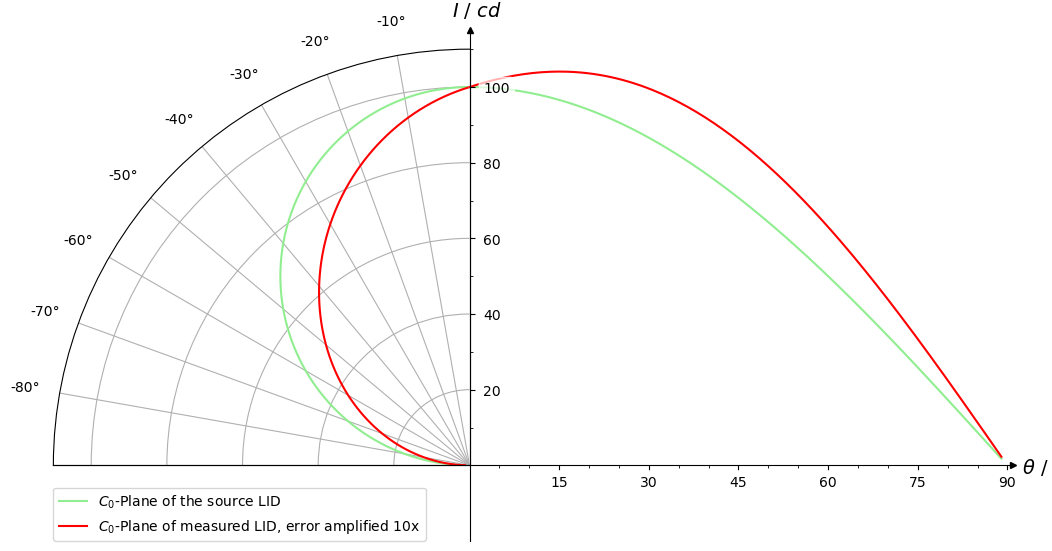

In [11]:
import matplotlib.pyplot as plt

# create figure and axes. 
fig = plt.figure(figsize=(12,8))
ax_cart, ax_polar, ax_cart2 = create_axes_LID(fig, cart=True, polar=True, cart2=False,
                                              theta_max=theta_max,theta_tick_dist=15,r_max = 115,r_min=-20)
# choose the c-plane to plot
c = 0
# plot both LIDs 
plot_cart_polar(theta_c, LID_source_c[c], ax_cart, ax_polar, c='lightgreen', label=r'$C_0$-Plane of the source LID')
plot_cart_polar(theta_c, LID_amplified_c[c], ax_cart, ax_polar, c='red', label=r'$C_0$-Plane of measured LID, error amplified 10x')
ax_cart.legend(loc=(0.0,0.0))

Now extended to make the plot interactive:
select C-Plane (angle of intersection), and the source offset in x,y,z
Select between relative or absolute parameter input. For absolute: also input the measurement distance

In [ ]:
# work in progress
%matplotlib inline

from ipywidgets import interact, FloatSlider
from IPython.display import display


Now perform a uncertainty analysis with this model.
First create Distributions for the uncertain input parameters: the source location

In [12]:
import chaospy as cp
# create the distributions for the location of the source
# cp.Uniform(lower limit, upper limit)
# cp.Normal(mean, std deviation)
x = cp.Uniform(-0.001, 0.001)
y = cp.Uniform(-0.001, 0.001)
z = cp.Uniform(-0.01, 0.01)

# the mc simulation is computationally too expensive for the whole coordinate space.
# only simulate a reduced set of phi-angles
phi_mc_deg = np.linspace(start=0,stop=360,num=3)[:-1]
phi_mc = np.deg2rad(phi_deg)[None,:]

In [ ]:
import uncertainpy as un
import numpy as np
from Helperfunctions import polar2cart, cart2polar
# run a montecarlo uncertainty quantification
if __name__ == '__main__':
    parameters = {"x_s": x, "y_s": y,"z_s": z,
                  "LID": LID_source_function, "theta_c": theta, "phi_c": phi_mc}

    model = un.Model(run=goniometer_model, labels=["LID Measurement"])
    UQ = un.UncertaintyQuantification(model=model, parameters=parameters)
    UQ.quantify(method='mc', plot=None, save=False, nr_mc_samples=2**14)   

On Windows machines everything in your script must be inside of an if __name__ == '__main__': block in order for multiprocess to work.


Running model: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40960/40960 [04:43<00:00, 144.68it/s]


In [ ]:
# remove evaluations before saving to reduce file size
UQ.data['goniometer'].pop('evaluations')
UQ.data['model_out_LID'].pop('evaluations')
UQ.data['model_out_dist'].pop('evaluations')
UQ.data['model_out_alpha'].pop('evaluations')
fname = UQ.model.name + "_" + method
UQ.save(filename=fname, folder="test")

## Evaluation of Influence of LC-Offset
- With this model we can examine the influence of translated LC for different szenarios.
- Translation has three components, one for every dimension.
- Examine cos^n sources increasing n: more narrowly bundled LID
    * good approximation for many sources
    * (approximately) rotationally symmetric LID
    * degrees of freedom of LC reduced: translation effectively has two components: along and orthogonal to the optical axis of the source
    * Optical Axis is Z-Axis. Orthogonal to that is X-Y plane.  
    * therefore: examine X-Y-Offset and Z-Offset separately
### X-Y Offset
- Normally an object with a roationally symetrical LID has the same symmetry in its cosntruction: e.g. a round opening / shape with a destinct center.
- Object is oriented accordingly: attempt to align principal axis of goniometer with optical axis of source.
- there are two reasons for X-Y Offset: 
    * Placement error, source not aligned
    * deviations from rotational symmetry: in LID of light source and in optics
- both of these influences are usually small.
Example 1:
Cos^1 Source, translated orthogonally by 1/1000.
- This means: for a measurement distance of 1m it would be translated by 1mm
- Cos^1: Lambertian characteristic.
- Result is shown in the following illustrations:
|![x_error](figures/Verformung_rel_i0_r1_e0.001/x_error.PNG) | ![y_error](figures/Verformung_rel_i0_r1_e0.001/y_error_wo_bar.PNG)|
|-|-|

3D-depiction of the original LID as a grid and the deviation resulting from the offset LC. Left Side: offset in X / right side offset in Y. Results in the same deformation, just rotated. To make the influence visible, the deviation is exaggerated by a factor of 100. The deformed LID is shaded according to the error in each direction relative to the luminous intensity along the optical axis (Hauptabstrahlrichtung).
In this szenario the error doesn't exceed 0.2% in any direction.


Same thing relative to each direction

small error can be substantial, when the overall luminance is small

### Z- Offset

The Z-position of the LC is generally hard to estimate. Even given a rotational symmetry there is no indicator where the LC should be assumed along the optical axis.

One assumption to make is that the LC is inside the housing. Does not have to be the case - e.g. highly focusing optics
standard procedure is often to position the object with the (Austrittsfläche) at the origin
that can result in a substantial offset of the LC along the z-axis
again visualize deformation, at first with same translation distance, comparable to X/Y-deformation

|![z_neg_error](figures/Verformung_rel_i0_r1_e0.001/z_neg_error.PNG) | ![z_pos_error](figures/Verformung_rel_i0_r1_e0.001/z_pos_error_wo_bar.PNG)|
|-|-|

- 100x, ...
- Influence of gradient: $cos^n$-Sources: Cos^1, Cos^10, Cos^50, Cos^100
